<center>
# Автовыделение интервалов коллектора по данным ГИС
<center>
В данном упражнении предлагается использовать все знания, полученные во время прохождения курса,
для решения задачи автоматической интерпретации каротажных кривых.
## Описание кейса
На основе седиментологического описания одного из обнажений Шестаковского полигона, расположенного в Томской области,
была построена синтетическая 3D геологическая модель.
<img src="img\Razrez.png">
При ее создании для повышения степени геологического реализма полученного результата в используемую
 структурную поверхность был внесен разлом, который разделяет модель в пропорции 1 к 4.
 Таким образом, с западной стороны от разлома структурная сетка содержит 324 ячейки, а с восточной - 1056.
 В каждой ячейке была создана синтетическая скважина и каротажные кривые, которые рассчитывались на основе
 априорных знаний о физических характеристиках тех или иных литологий и ячеек, которые пересекала скважина.

<center>
# Цель работы
Основная цель работы заключается в том, чтобы используя информацию по восточной части месторождения (1056 скважин)
построить модель, которая сможет прогнозировать наличие или отсутствие коллектора в интервале в зависимости
от показаний каротажных кривых. Далее, используя полученную модель, необходимо предсказать наличие или отсутствие
коллектора для скважин, находящихся западнее от разлома (324).
<img src="img\NTG.png">

In [1]:
# Загружаем необходимые библиотеки
import pandas as pd
import numpy as np
import random as rd
import seaborn as sns
import lasio
from os import listdir
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, accuracy_score
%matplotlib inline

In [2]:
# Загружаем данные тренировочной части
train_data = pd.DataFrame()
for file in listdir(r'data\train_test'):
    las_file = lasio.read(r'data\train_test\%s'%file).df().reset_index()
    las_file['Well'] = file[:-4]
    train_data = train_data.append(las_file, ignore_index = True)
train_data.columns = ['DEPT', 'SP', 'GR', 'DT', 'DENS', 'LITHO', 'Well']

Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.
Header section Parameter regexp=~P was not found.


<center>

## Описание данных

Файл с тренировочными данными содержит информацию по 1056 скважинам, находящимся восточнее разлома.
Каждая скважина представлена 4 каротажными кривыми:

- **SP** (каротаж естественной поляризации)
- **GR** (гамма каротаж)
- **DT** (акустический каротаж)
- **Density** (плотностной каротаж)

В качестве кривой РИГИС выступает дискретный каротаж **LITHO**, который при значении "1" говорит о наличие коллектора,
а при значении "0" о его отсутствии.

<center>
##### Статистическая оценка

В этом блоке мы поближе изучим данные со статистической точки зрения.

In [3]:
# Посмотрим, какие типы данных представлены в загруженном файле и есть ли в нем пропуски
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203099 entries, 0 to 203098
Data columns (total 7 columns):
DEPT     203099 non-null float64
SP       203099 non-null float64
GR       203099 non-null float64
DT       203099 non-null float64
DENS     203099 non-null float64
LITHO    203099 non-null float64
Well     203099 non-null object
dtypes: float64(6), object(1)
memory usage: 10.8+ MB


In [4]:
# Посмотрим статистику по данным

train_data.describe()

,DEPT,SP,GR,DT,DENS,LITHO
count,203099.000000,203099.000000,203099.000000,203099.000000,203099.000000,203099.000000
mean,2514.029415,-77.407355,90.875375,307.165724,2.342216,0.323414
std,9.306925,27.588862,19.810404,11.667743,0.022138,0.467780
min,2485.100000,-125.710487,57.799000,283.392731,2.295403,0.000000
25%,2507.800000,-102.279652,71.676132,297.902679,2.324109,0.000000
50%,2514.900000,-72.802902,93.382996,303.161560,2.349329,0.000000
75%,2521.000000,-52.256079,111.070805,316.708115,2.359741,1.000000
max,2543.700000,-38.943268,116.989639,330.196503,2.390461,1.000000


**Задание №1**.

Здесь Вам предлагается посчитать статистические характеристики для представленных данных.
Используя стандартные методы библиотеки **pandas** (фильтрация и **median**), определите медианные значения каротажей
SP и GR для разностей коллектора и неколлектора.

Далее, используя метод **corr** библиотеки **pandas**, определите коэффициенты корреляции Пирсона для всех каротажных кривых.

In [ ]:
# Ваш код здесь

<center>
##### Визуальная оценка

Ниже будет проведена визуальная оценка данных с целью найти какие-либо зависимости в данных для лучшего их понимания.

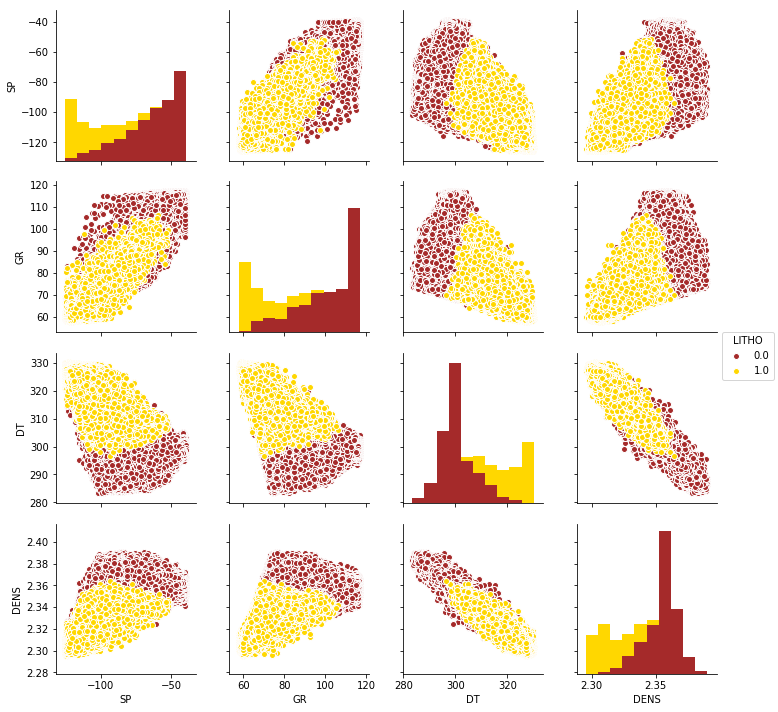

In [5]:
# Проведем визуальную оценку имеющийся информации
target_logs = [log for log in train_data.columns if log not in ['LITHO', 'Well', 'DEPT']]
sns.pairplot(train_data, vars = target_logs, hue = 'LITHO', palette = ['brown', 'gold'])

**Задание №2**.

Здесь Вам предлагается,  используя библиотеку **seaborn**, построить **heatmap** ранее посчитанной
корреляционной матрицы по имеющемуся набору данных.

In [ ]:
# Ваш код здесь

<center>
## Генерация дополнительных признаков (опционально)
Как известно, чем больше информации мы имеем, тем более полно мы можем описать систему, порождающую то или иное распределение.
В данном блоке Вам предлагается попробовать построить какие-либо новые признаки на основе уже имеющихся,
которые помогли бы в построении более сложной и качественной модели.

Например, Вы можете использовать данные о расположении скважины как дополнительный признак,
взять логарифмические или степенные функции каротажей, а также посчитать их производные.

Если Вы чувствуете, что Ваших знаний языка Python недостаточно, то этот шаг можно пропустить.

In [ ]:
# Ваш код здесь

<center>
## Подготовка данных и построение базовой модели
В представленном задании перед слушателем стоит 2 цели - индивидуальная и участие в соревновании среди слушателей.

Индивидуальной целью является победа над имеющейся простейшей моделью на тестовом наборе данных.

Соревновательная цель заключается в участии в соревновании среди всех слушателей, во время которого от Вас требуется
показать наилучший результат предсказания распределения интервалов коллектора на скрытом наборе данных
(скважины находящиеся западнее разлома).

В блоках ниже расположен код, отвечающий за разбитие данных на тренировочную и тестовую части,
а также построение базовой модели с последующей оценкой ее качества.

In [6]:
# Разобьем данные на тренировочную и тестовую части в пропорции 0.7 и 0.3 соответственно

train_part_size = 0.7

# Случайно выберем скважины для тренировочного и тестового наборов
rd.seed(17)
train_wells = rd.sample(train_data.Well.unique().tolist(), round(len(train_data.Well.unique())*train_part_size))
train_set = train_data.loc[train_data.Well.isin(train_wells)]
test_set = train_data.loc[train_data.Well.isin(i for i in train_data.Well.unique() if i not in train_wells)]

In [7]:
# Разобьем данные тренировочной и тестовой частей на матрицу признаков и вектор классов

Feature_train = train_set.drop(['DEPT', 'Well', 'LITHO'], axis = 1)
Target_train = train_set['LITHO']

Feature_test = test_set.drop(['DEPT', 'Well', 'LITHO'], axis = 1)
Target_test = test_set['LITHO']

In [8]:
# Здесь мы для предсказания будем использовать одну из самых простых моделей - Метод ближайшего соседа
# Полученная точность будет взята за планку, которую необходимо побить
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(Feature_train, Target_train)
predicted_litho = clf.predict(Feature_test)

In [9]:
# Посчитаем точность полученную нашей baseline-моделью
# Считаться будут две метрики - F1 и Accuracy
base_acc = accuracy_score(Target_test, predicted_litho)
base_f1 = f1_score(Target_test, predicted_litho)
print('F1 метрика равна %.3f, и доля правильных ответов составляет %.3f для базового кейса.'%(base_f1, base_acc))

F1 метрика равна 0.850, и доля правильных ответов составляет 0.902 для базового кейса.


<center>

# Построение модели

**Задание №3**.

Загрузив все необходимые данные, проведя их их предварительную обработку и получив первые предсказания,
можно перейти непосредственно к построению собственной модели.
В ячейке ниже создайте свою модель, которая будет называться **user_clf**, предварительно импортировав необходимые библиотеки.
После чего получите с ее помощью предсказание для тестовой части набора **Feature_test**, назвав переменную,
хранящую предсказание, именем **user_prediction**.

Вам необходимо выбрать такую модель, которая показала бы более высокую точность предсказания, чем модель в ячейках выше.

In [ ]:
# Ваш код здесь

In [10]:
# Посчитаем точность полученную моделью слушателя
# Считаться будут две метрики - F1 и Accuracy
user_acc = accuracy_score(Target_test, user_prediction)
user_f1 = f1_score(Target_test, user_prediction)
print('F1 метрика равна %.3f, и доля правильных ответов составляет %.3f для модели слушателя.'%
      (user_f1, user_acc))

NameError: name 'user_prediction' is not defined

<center>
# Предсказание по скрытым скважинам (соревновательная часть)
На данный момент Вы уже имеете наилучшую на Ваш взгляд модель.
Теперь ее можно использовать для предсказания распределения интервалов коллектора на скрытой части данных.
В дальнейшем предсказание каждого слушателя будет проверено по имеющимся реальным меткам коллектора и оценено соответствующими метриками.
Все участники узнают точность своего предсказания только в конце соревнования, когда будет получен сводный итог.

От Вас требуется лишь запустить блок ниже, результат автоматически будет загружен на сервер.

**P. S.**

Если Вы создавали дополнительные признаки на основе уже имеющихся, то Вам необходимо будет также создать их
и для той части данных, которая ранее была скрыта.

In [11]:
# В переменную user_name введите свою фамилию и инициалы, как в примере ниже
user_name = 'ФамилияИО'

In [12]:
# Загружаем данные каротажей по скрытым скважинам и предобрабатываем их
validation_data = pd.read_csv('data\Shestakovo_validation.csv')
Feature_valid = validation_data.drop(['Well', 'DEPT'], axis = 1)
valid_predict = pd.Series(user_clf.predict(Feature_valid), name='%s_prediction'%user_name)
valid_predict.to_csv('%s_prediction.csv'%user_name, index = None)

NameError: name 'user_clf' is not defined